# Lab 5: Cross- Validation and the Boostrap
Two most commonly used resampling techniques:
- Cross-validation: It's used to estimate the test error how well model is performing on unseen data.

- Types : K-folds CV, LOOCV, Stratified k-fold CV (for imbalanced)
Boostrap: used quantify the uncertainty associated with a given estimator

## The Validation Set Approach 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)
from sklearn.model_selection import train_test_split

In [2]:
from functools import partial
from sklearn.model_selection import \
(cross_validate,
KFold,
ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [3]:
Auto = load_data('Auto')

In [4]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
Auto_train, Auto_valid = train_test_split(Auto,
                                          test_size=196,
                                            random_state=0)

In [6]:
Auto_train.shape, Auto_valid.shape

((196, 8), (196, 8))

In [7]:
hp_mm = MS(['horsepower'])
X_trian = hp_mm.fit_transform(Auto_train)
y_train = Auto_train['mpg']
model = sm.OLS(y_train, X_trian)
resutlts = model.fit()
summarize(resutlts)

,coef,std err,t,P>|t|
intercept,39.9055,1.009,39.537,0.0
horsepower,-0.1563,0.009,-17.333,0.0


### Calculate the validation MSE of the model 

In [8]:
X_valid = hp_mm.fit_transform(Auto_valid)
y_valid = Auto_valid['mpg']
pred = resutlts.predict(X_valid)
np.mean((y_valid - pred)**2)

23.61661706966988

### Estimating Higer-degree polynomial regreesions MSE

In [9]:
def evalMSE(terms,
            response,
            train,
            test):
        mm = MS(terms)
        X_train = mm.fit_transform(train)
        y_train = train[response]
        X_test = mm.transform(test)
        y_test = test[response]
        results = sm.OLS(y_train, X_train).fit()
        test_pred = results.predict(X_test)
        return np.mean((y_test - test_pred)**2)

In [10]:
MSE = np.zeros(3)

In [11]:
MSE

array([0., 0., 0.])

In [12]:
MSE = np.zeros(3)
for idx, degree in enumerate(range(1, 4)):
    MSE[idx] = evalMSE([poly('horsepower', degree)],
                       'mpg',
                       Auto_train,
                       Auto_valid)
MSE

array([23.61661707, 18.76303135, 18.79694163])

In [13]:

Auto_train, Auto_valid = train_test_split(Auto,
                            test_size=196,
                            random_state=3)
MSE = np.zeros(3)
for idx, degree in enumerate(range(1, 4)):
    MSE[idx] = evalMSE([poly('horsepower', degree)],
                       'mpg',
                       Auto_train,
                       Auto_valid)
MSE

array([20.75540796, 16.94510676, 16.97437833])

## Cross- Validation 

In [14]:
hp_model = sklearn_sm(sm.OLS,
                MS(['horsepower']))

In [15]:
X, Y = Auto.drop(columns=['mpg']), Auto['mpg']

In [16]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [17]:
X

,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1
buick skylark 320,8,350.0,165,3693,11.5,70,1
plymouth satellite,8,318.0,150,3436,11.0,70,1
amc rebel sst,8,304.0,150,3433,12.0,70,1
ford torino,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
ford mustang gl,4,140.0,86,2790,15.6,82,1
vw pickup,4,97.0,52,2130,24.6,82,2
dodge rampage,4,135.0,84,2295,11.6,82,1


In [18]:
Y

name
chevrolet chevelle malibu    18.0
buick skylark 320            15.0
plymouth satellite           18.0
amc rebel sst                16.0
ford torino                  17.0
                             ... 
ford mustang gl              27.0
vw pickup                    44.0
dodge rampage                32.0
ford ranger                  28.0
chevy s-10                   31.0
Name: mpg, Length: 392, dtype: float64

In [19]:
cv_results = cross_validate(hp_model,
                            X,
                            Y,
                            cv = Auto.shape[0]
                        )

In [20]:
# get the number of rows 
Auto.shape[0]

392

### Leave-One-Out Cross-Validation (LOOCV)!

In [21]:
cv_err = np.mean(cv_results['test_score'])
print(f"LOOCV MSE: {cv_err:.2f}")

LOOCV MSE: 24.23


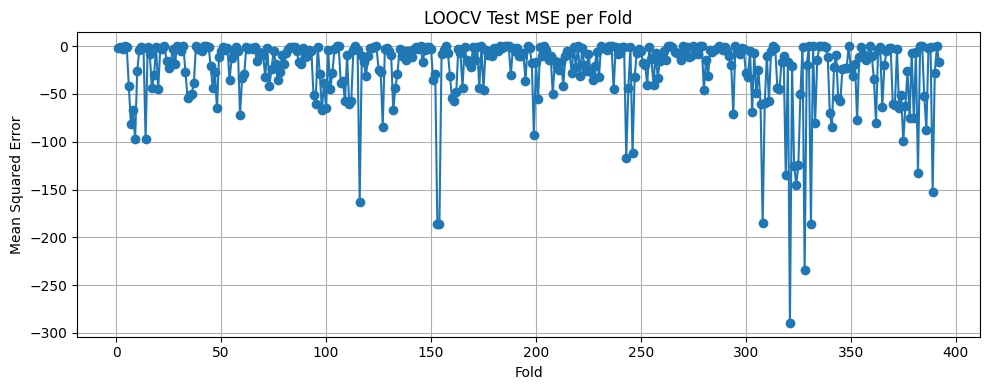

In [22]:
# Extract MSE per fold and convert to positive
mse_per_fold = - cv_results['test_score']
# Plot
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(mse_per_fold) + 1), mse_per_fold, marker='o', linestyle='-')
plt.title('LOOCV Test MSE per Fold')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
worst_folds = np.argsort(mse_per_fold)[-5:]  # Indices of worst 5 errors
print("Worst performing folds:", worst_folds)
print("Corresponding MSEs:", mse_per_fold[worst_folds])

Worst performing folds: [203 294 335  22  31]
Corresponding MSEs: [-0.00958491 -0.00847276 -0.00595306 -0.00354618 -0.00354618]


In [24]:
cv_error = np.zeros(5)
H = np.array(Auto['horsepower'])
M = sklearn_sm(sm.OLS)

In [25]:
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M,
    X,
    Y,
    cv=Auto.shape[0])
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

array([24.23151352, 19.24821312, 19.33498406, 19.42443029, 19.03320648])

### KFold 

In [26]:
cv_error = np.zeros(5)
cv = KFold(n_splits=10,
           shuffle=True,
           random_state=0) # use same splits for each degree


In [27]:
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=cv)
    cv_error[i] = np.mean(M_CV['test_score'])
    

In [28]:

cv_error

array([24.20766449, 19.18533142, 19.27626666, 19.47848403, 19.13720065])

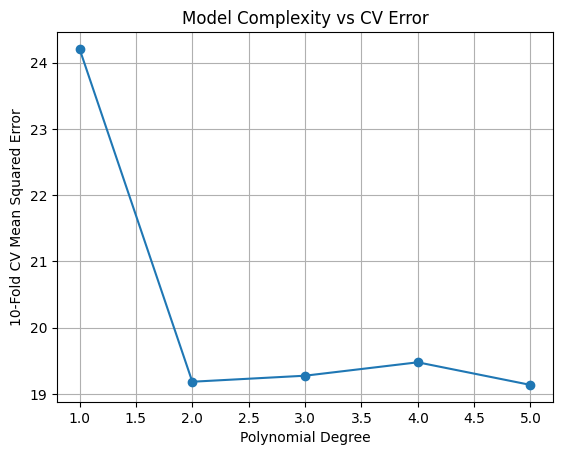

In [29]:
degrees = [1, 2, 3, 4, 5]
# Plot
plt.plot(degrees, cv_error, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("10-Fold CV Mean Squared Error")
plt.title("Model Complexity vs CV Error")
plt.grid(True)
plt.show()

In [30]:
validation = ShuffleSplit(n_splits=1,
                          test_size=196,
                          random_state=0)
results = cross_validate(hp_model,
                         Auto.drop(['mpg'], axis=1),
                         Auto['mpg'],
                         cv=validation);
results['test_score']

array([23.61661707])

In [31]:
validation = ShuffleSplit(n_splits=1,
                          test_size=196,
                          random_state=0)
results = cross_validate(hp_model,
                         Auto.drop(['mpg'], axis=1),
                         Auto['mpg'],
                         cv=validation);
results['test_score'].mean(), results['test_score'].std()

(23.61661706966988, 0.0)

In [32]:
validation = ShuffleSplit(n_splits=10,
                          test_size=196,
                          random_state=0)
results = cross_validate(
    hp_model,
    Auto.drop(['mpg'], axis=1),
    Auto['mpg'],
    cv=validation,
    return_train_score=True,
    scoring='neg_mean_squared_error'
)
results['test_score'].mean(), results['test_score'].std()

(-23.802232661034168, 1.4218450941091842)

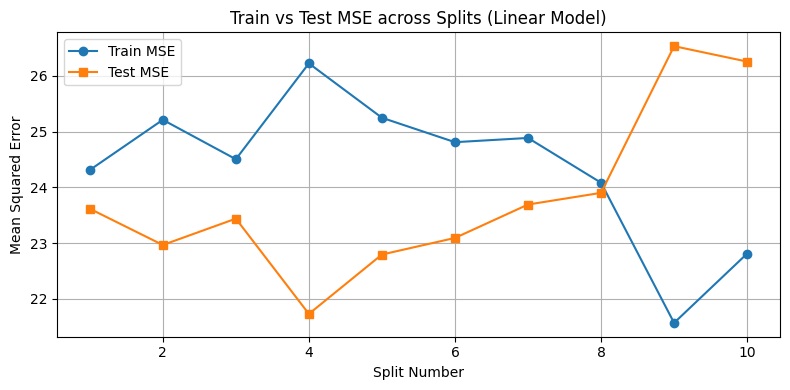

In [33]:
train_mse = -results['train_score']
test_mse = -results['test_score']

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), train_mse, marker='o', label='Train MSE')
plt.plot(range(1, 11), test_mse, marker='s', label='Test MSE')
plt.title("Train vs Test MSE across Splits (Linear Model)")
plt.xlabel("Split Number")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


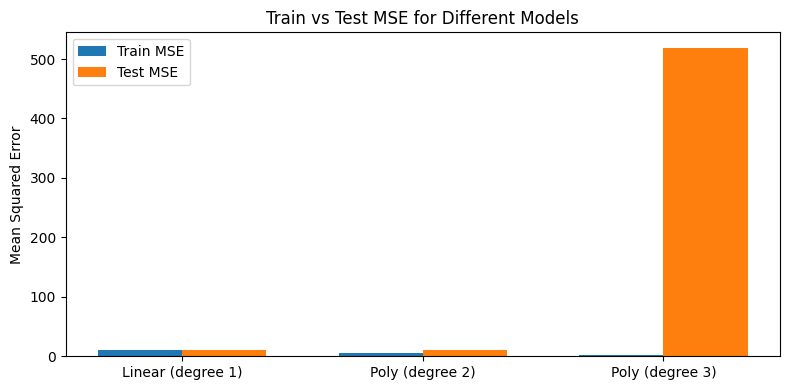

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

validation = ShuffleSplit(n_splits=10, test_size=196, random_state=0)

# Models
models = {
    "Linear (degree 1)": make_pipeline(PolynomialFeatures(1), LinearRegression()),
    "Poly (degree 2)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Poly (degree 3)": make_pipeline(PolynomialFeatures(3), LinearRegression())
}

model_errors = {}

for name, model in models.items():
    res = cross_validate(
        model,
        Auto.drop(['mpg'], axis=1),
        Auto['mpg'],
        cv=validation,
        return_train_score=True,
        scoring='neg_mean_squared_error'
    )
    model_errors[name] = (-res['test_score'].mean(), -res['train_score'].mean())

# Plot
labels = list(model_errors.keys())
test_errors = [v[0] for v in model_errors.values()]
train_errors = [v[1] for v in model_errors.values()]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x - width/2, train_errors, width, label='Train MSE')
plt.bar(x + width/2, test_errors, width, label='Test MSE')
plt.xticks(x, labels)
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test MSE for Different Models')
plt.legend()
plt.tight_layout()
plt.show()


# The Boostrap 

In [35]:
Portfolio = load_data('Portfolio')
Portfolio.head()

,X,Y
0,-0.895251,-0.234924
1,-1.562454,-0.885176
2,-0.417090,0.271888
3,1.044356,-0.734198
4,-0.315568,0.841983


In [36]:
# minimum variance linear combination of X and Y
def alpha_func(D, idx):
    cov_ = np.cov(D[['X','Y']].loc[idx], rowvar=False)
    return ((cov_[1,1] - cov_[0,1]) /
            (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

In [37]:
alpha_func(Portfolio, range(100))

0.57583207459283

In [38]:
rng = np.random.default_rng(0)
alpha_func(Portfolio,
           rng.choice(100,
                      100,
                      replace=True))

0.6074452469619004

In [39]:
rng

Generator(PCG64) at 0x7FBB999663C0

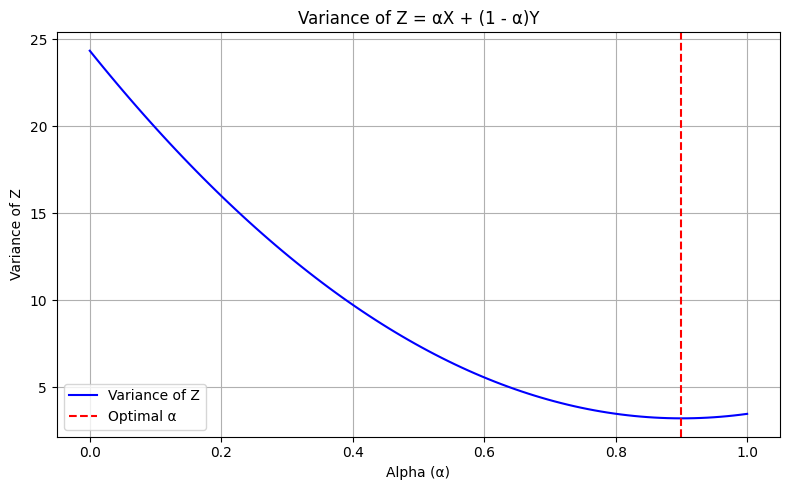

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (you can replace this with your real D[['X', 'Y']])
np.random.seed(42)
X = np.random.normal(loc=10, scale=2, size=200)
Y = np.random.normal(loc=10, scale=5, size=200)
D = pd.DataFrame({'X': X, 'Y': Y})

# Range of alpha values from 0 to 1
alphas = np.linspace(0, 1, 100)
variances = []

for alpha in alphas:
    Z = alpha * D['X'] + (1 - alpha) * D['Y']
    var_Z = np.var(Z, ddof=1)  # sample variance
    variances.append(var_Z)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(alphas, variances, label='Variance of Z', color='blue')
plt.axvline(x=alphas[np.argmin(variances)], color='red', linestyle='--', label='Optimal α')
plt.title('Variance of Z = αX + (1 - α)Y')
plt.xlabel('Alpha (α)')
plt.ylabel('Variance of Z')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
rng = np.random.default_rng(0)

boot_alphas = []

for _ in range(1000):  # 1000 bootstrap samples
    idx = rng.choice(100, 100, replace=True)
    alpha = alpha_func(Portfolio, idx)
    boot_alphas.append(alpha)

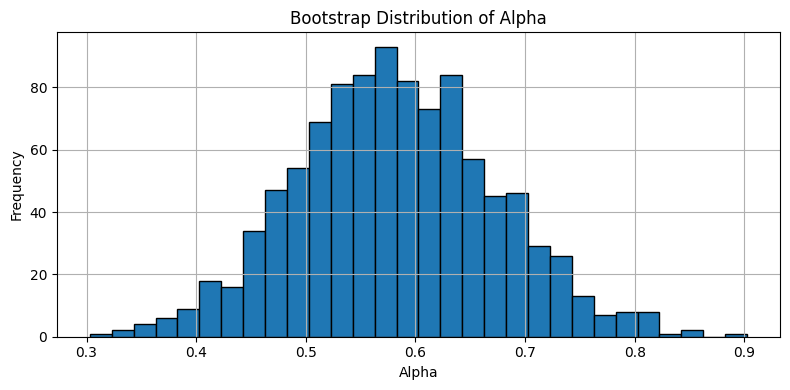

In [42]:
plt.figure(figsize=(8, 4))
plt.hist(boot_alphas, bins=30, edgecolor='black')
plt.title("Bootstrap Distribution of Alpha")
plt.xlabel("Alpha")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

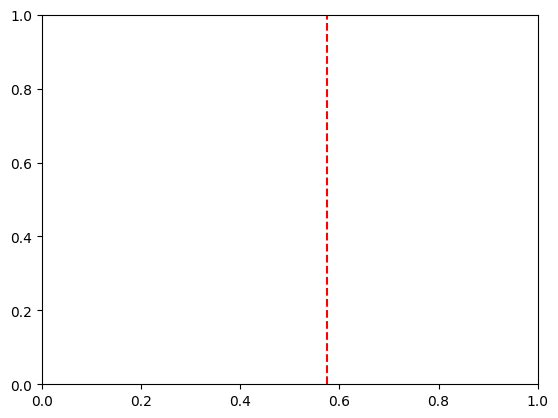

In [43]:
original_alpha = alpha_func(Portfolio, Portfolio.index)
plt.axvline(original_alpha, color='red', linestyle='--', label='Original α')


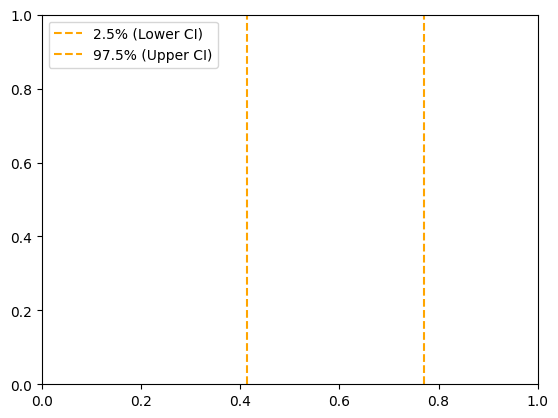

In [44]:
lower = np.percentile(boot_alphas, 2.5)
upper = np.percentile(boot_alphas, 97.5)

plt.axvline(lower, color='orange', linestyle='--', label='2.5% (Lower CI)')
plt.axvline(upper, color='orange', linestyle='--', label='97.5% (Upper CI)')
plt.legend()


In [45]:
# ✅ So this is indeed the bootstrap estimate of the standard error for func.
def boot_SE(func, D, n=None, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]

    for _ in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)


In [46]:
alpha_SE = boot_SE(alpha_func,
                Portfolio,
                B=1000,
                seed=0)
alpha_SE

0.09118176521277699

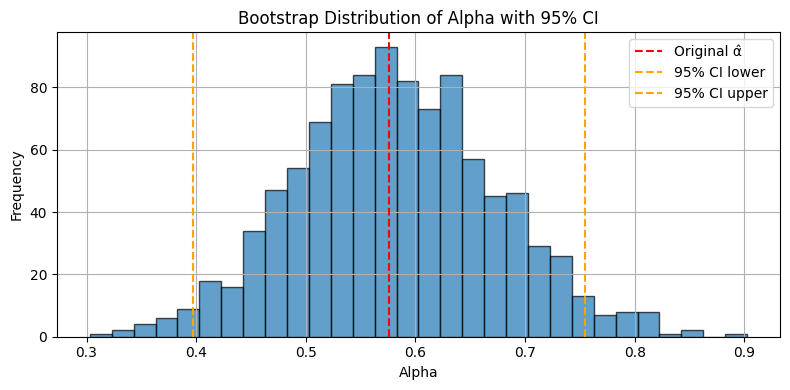

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate confidence interval
lower = original_alpha - 1.96 * alpha_SE
upper = original_alpha + 1.96 * alpha_SE

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(boot_alphas, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(original_alpha, color='red', linestyle='--', label='Original α̂')
plt.axvline(lower, color='orange', linestyle='--', label='95% CI lower')
plt.axvline(upper, color='orange', linestyle='--', label='95% CI upper')
plt.title("Bootstrap Distribution of Alpha with 95% CI")
plt.xlabel("Alpha")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Simple Linear Regression using Boostrap 

In [48]:
def boot_OLS(model_matrix, response, D, idx):
    D_ = D.loc[idx]
    Y_ = D_[response]
    X_ = clone(model_matrix).fit_transform(D_)
    return sm.OLS(Y_, X_).fit().params

In [49]:
hp_func = partial(boot_OLS, MS(['horsepower']), 'mpg')

In [50]:
rng = np.random.default_rng(0)

np.array([hp_func(Auto,
                  rng.choice(Auto.index, size=392, replace=True)) 
          for _ in range(10)])

array([[39.12226577, -0.1555926 ],
       [37.18648613, -0.13915813],
       [37.46989244, -0.14112749],
       [38.56723252, -0.14830116],
       [38.95495707, -0.15315141],
       [39.12563927, -0.15261044],
       [38.45763251, -0.14767251],
       [38.43372587, -0.15019447],
       [37.87581142, -0.1409544 ],
       [37.95949036, -0.1451333 ]])

In [51]:
hp_se = boot_SE(hp_func,
                Auto,
                B=1000,
                seed=10)
hp_se

intercept     0.731176
horsepower    0.006092
dtype: float64

In [52]:
hp_model.fit(Auto, Auto['mpg'])
model_se = summarize(hp_model.results_)['std err']
model_se

intercept     0.717
horsepower    0.006
Name: std err, dtype: float64

In [53]:
quad_model = MS([poly('horsepower', 2, raw=True)])
quad_func = partial(boot_OLS,
quad_model,
'mpg')
boot_SE(quad_func, Auto, B=1000)

intercept                                  1.538641
poly(horsepower, degree=2, raw=True)[0]    0.024696
poly(horsepower, degree=2, raw=True)[1]    0.000090
dtype: float64

In [54]:
M = sm.OLS(Auto['mpg'],
quad_model.fit_transform(Auto))
summarize(M.fit())['std err']

intercept                                  1.800
poly(horsepower, degree=2, raw=True)[0]    0.031
poly(horsepower, degree=2, raw=True)[1]    0.000
Name: std err, dtype: float64